In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph


In [2]:
# load data
twomoons = "C:/Users/alepa/Desktop/Data Science/[1] 2nd Semester/Mathematical Models and Numerical Methods for Big Data/Code/twomoons.txt"
data_text = np.loadtxt(twomoons, delimiter=',')

x_coords = data_text[:, 0]
y_coords = data_text[:, 1]

data = pd.DataFrame(data_text, columns=['x', 'y'])


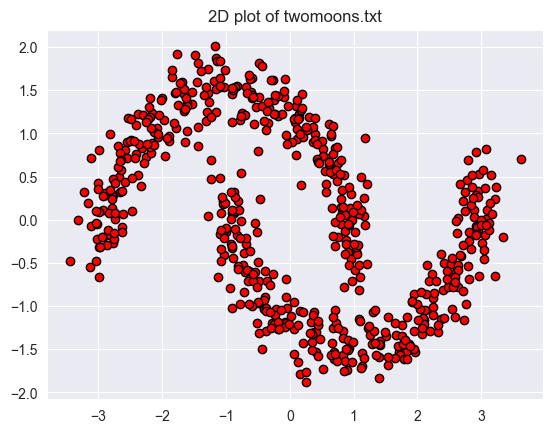

In [3]:
plt.scatter(x_coords, y_coords, color='red', edgecolor='k')
plt.title('2D plot of twomoons.txt')
plt.show()


In [4]:
# a thumb rule for k-NN is to set k to the square root of the number of data points
k = int(np.sqrt(len(data_text))) # 141


In [5]:
# constructing the k-nearest neighbor graph
knn_graph = kneighbors_graph(data, n_neighbors=k, mode='connectivity', include_self=False)
A = knn_graph.toarray()


In [6]:
# get Laplacian
D = np.diag(A.sum(axis=1))
L = D - A


In [7]:
# eigendecomposition to get the first 6 eigenvectors with numpy
eigenvalues, eigenvectors = np.linalg.eigh(L)
eigenvectors = eigenvectors[:, :6]


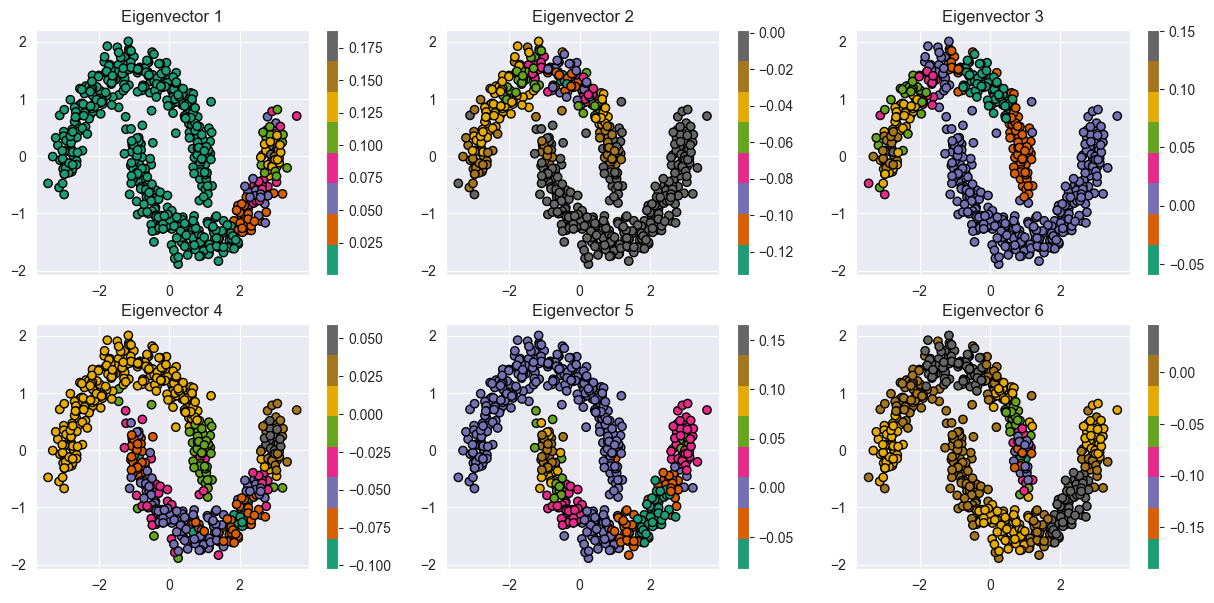

In [8]:
# plotting the eigenvectors
plt.figure(figsize=(15, 7))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.scatter(x_coords, y_coords, c=eigenvectors[:, i], cmap='Dark2', edgecolor='k')
    plt.title(f'Eigenvector {i + 1}')
    plt.colorbar()

plt.show()
